# E-Commerce Customer Churn Prediction with Machine Learning Classification
---

## Context

In the realm of e-commerce, anticipating customer churn is crucial because acquiring new customers incurs substantial costs, potentially offsetting revenue gains.  Where acquiring a new customer is anywhere from **5 to 25 times more expensive** than retaining an existing one. And that’s just one customer!

Accurately predicting customer churn  allows businesses to allocate resources efficiently and enhance overall operational strategies.


To address this challenge, the e-commerce company are building a predictive Machine Learning model to identify customers who are likely to churn.
And devise a strategic plan: 

When the predictive model indicates a customer might churn, the company initiates a loyalty promotion program. This proactive approach not only retains existing customers but also saves the business from the expense of acquiring new ones.


For this case, the policy can be defined as:
- If the model predicts that the customer is churning , the e-commerce will offer a loyalty promotion to other customers.
- If the model predicts that the customer is not churning, the e-commerce will not offer a loyalty promotion to other customers.


## Model Objective

The business will incure higher cost if the model fails to predicts that the customer will not be churning, but it is actually churning.


| |  |
| --- | --- |
If Churn == 1 (Yes), the customer is churning. | **Positive Class**
If Churn == 0 (No), the customer is not churning. | **Negative Class**


Therefore, we would like to identify the potential churning as much as possible, the model should minimize **False Negative** counts and optimize **Recall**, 


we will use **F2 Score** as the primary evaluation metrics for the model.

*beta = 2 (F2-score) : recall twice as important as precision

- https://hbr.org/2014/10/the-value-of-keeping-the-right-customers
- https://hbswk.hbs.edu/archive/the-economics-of-e-loyalty
- https://firstpagesage.com/reports/average-cac-for-ecommerce-companies/

## Data Profile

The data set belongs to a leading online E-commerce company. The data set contains customer level information and churn status. 

| Column Name | Description |
| --- | --- |
|	Tenure                  | Tenure of a customer in the company.. |
|	WarehouseToHome         | Distance between the warehouse to the customer’s home|
|	NumberOfDeviceRegistered|    Total number of deceives is registered on a particular customer|
|	PreferedOrderCat        |    Preferred order category of a customer in the last month|
|	SatisfactionScore       |   Satisfactory score of a customer on service|
|	MaritalStatus           |   Marital status of a customer|
|	NumberOfAddress         |     Total number of added on a particular customer|
|	Complaint               |   Any complaint has been raised in the last month|
|	DaySinceLastOrder       |   Day since last order by customer|
|	CashbackAmount          |  Average cashback in last month|
|	Churn                   |   Churn flag|


- Precision: TP / (TP + FP) --> Exactness, Maximize only the correct positive predictions (masukin hanya yang beneran jahat ke penjara)
    - Precision is important when the cost of False Positive is high
    - Precision is not important when the cost of False Negative is high
- Recall: TP / (TP + FN) -->  Completeness, Maximize the number of positive predictions by minimizing the False Negative, (masukin sebanyak2nya penjahat ke penjara)
    - Recall is important when the cost of False Negative is high
    - Recall is not important when the cost of False Positive is high

## Outline

1. Data Preparation
2. Model Selection based on F2 Score
    - Logistic Regression
    - Decision Tree
    - KNN 
    - Voting Classifier (Logistic Regression, Decision Tree, KNN)
    - Stacked Model (Logistic Regression, Decision Tree, KNN)
    - Random Forest
    - XGBoost
3. Best Model Tuning and Evaluation
4. Conclusion

# 1. Initiate Library & Import Data

In [790]:
#Load data
## EDA Standard Libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats as ss

In [791]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [792]:
#Load data
df = pd.read_csv('/Users/Dwika/My Projects/CAPSTONE 3 PURWADHIKA/DATA/data_ecommerce_customer_churn.csv')

In [793]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [794]:
#Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [795]:
#Construct deep Info on columns & values:

datainfo = []
for i in df.columns:
    datainfo.append([i, df[i].dtypes,
                      df[i].isna().sum(),
                      round((((df[i].isna().sum())/(len(df)))*100),2), 
                    df[i].nunique(), 
                    df[i].sample(3).values])
pd.DataFrame(datainfo, columns = ['Features', 'Data Type', 'Missing Values', 'Missing (%)', 'Unique Counts','Unique Samples'])


,Features,Data Type,Missing Values,Missing (%),Unique Counts,Unique Samples
0,Tenure,float64,194,4.92,36,"[5.0, 3.0, 21.0]"
1,WarehouseToHome,float64,169,4.29,33,"[20.0, 11.0, 17.0]"
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[5, 5, 4]"
3,PreferedOrderCat,object,0,0.00,6,"[Laptop & Accessory, Mobile Phone, Others]"
4,SatisfactionScore,int64,0,0.00,5,"[5, 1, 4]"
5,MaritalStatus,object,0,0.00,3,"[Married, Divorced, Married]"
6,NumberOfAddress,int64,0,0.00,14,"[11, 10, 6]"
7,Complain,int64,0,0.00,2,"[0, 0, 0]"
8,DaySinceLastOrder,float64,213,5.40,22,"[2.0, 7.0, 2.0]"
9,CashbackAmount,float64,0,0.00,2335,"[171.49, 208.21, 124.3]"


# 2. Data Cleaning & Preprocessing

### 2.1 Duplicate Data Cleaning

In [796]:
#Check Duplicate data
df.duplicated().sum()   


671

In [797]:
#Drop duplicate
df = df.drop_duplicates()

> Dropped **671** of duplicated rows

### 2.2 Missing Data Cleaning

In [798]:
#Check missing value on specific columns
df.isnull().sum()


Tenure                      160
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [799]:
#Check the columns which have missing value
missing_rows = df[df[['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']].isnull().any(axis=1)]
missing_rows.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
10,6.0,26.0,6,Fashion,3,Married,5,0,NaN,221.10,0
13,1.0,7.0,5,Fashion,3,Divorced,7,0,NaN,231.09,1
16,NaN,21.0,5,Mobile,1,Married,1,1,3.0,121.68,0
27,0.0,NaN,1,Mobile,3,Single,4,1,3.0,124.32,1


In [800]:
#Total number of missing values
len(missing_rows)

476

In [801]:
#Total percentage of missing values
len(missing_rows) / len(df) * 100

14.5565749235474

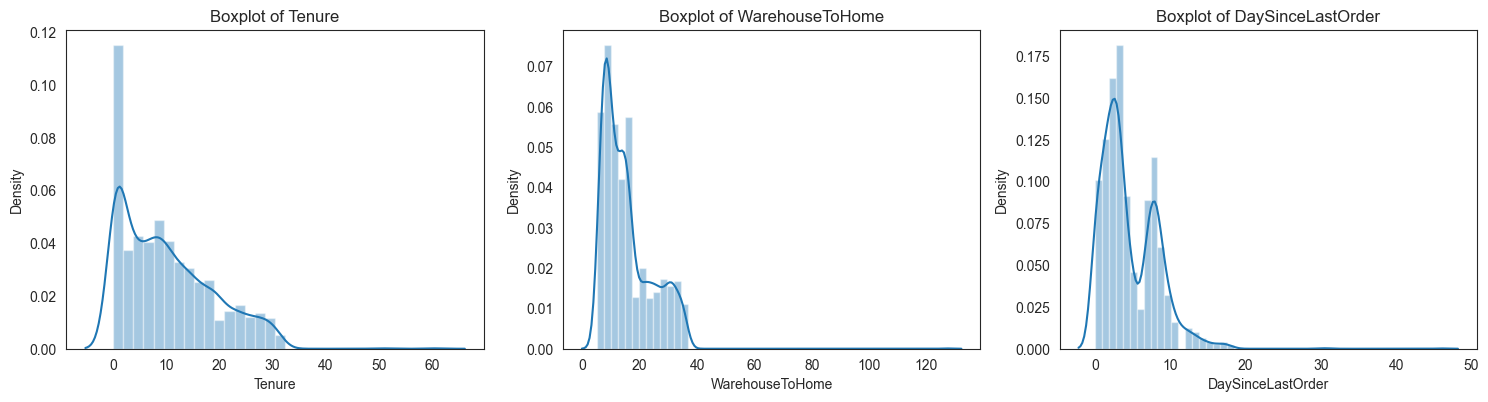

In [802]:
#Plot numerical columns distributions
numerical_cols = ['Tenure', 'WarehouseToHome', 'DaySinceLastOrder']

#Plotting boxplot for numerical values 
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.distplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

> All columns are not normally distributed, so we fill the missing values with median.

In [803]:
#Fill missing value with median
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median())

df.isnull().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

> Filled total of  476 missing values with their respected median values.
- Tenure                      160
- WarehouseToHome             135
- DaySinceLastOrder           181 



## 2.2 Outliers Detection

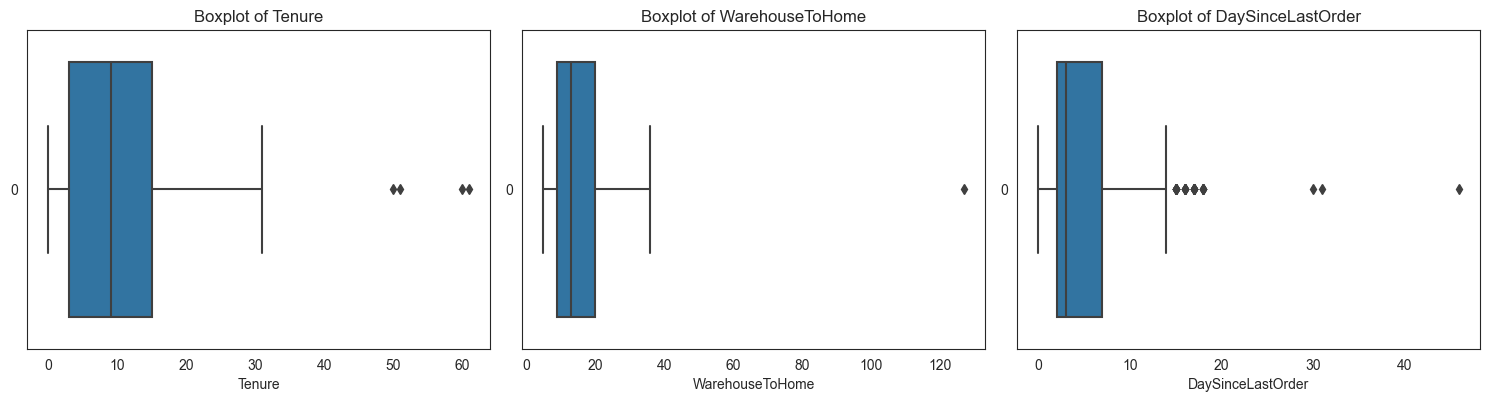

In [804]:
#Plotting boxplot for numerical values 
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df[column], orient='horizontal')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

In [805]:
# Check the outliers
len(df[df['Tenure'] > 40])

4

In [806]:
# Check the outliers
len(df[df['WarehouseToHome'] > 40])

1

In [807]:
# Check the outliers
len(df[df['DaySinceLastOrder'] > 20])

3

In [808]:
#Find all outliers index
tenureOutliers = df[df['Tenure'] > 40].index
distanceOutliers = df[df['WarehouseToHome'] > 40]
lastorderOutliers = df[df['DaySinceLastOrder'] > 20]

#create list from indexes
outliers = list(tenureOutliers) + list(distanceOutliers.index) + list(lastorderOutliers.index)
outliers

[51, 449, 1209, 3778, 2717, 181, 3591, 3830]

> We will drop the total of 8 rows with outliers in the dataset.

In [809]:
# Remove outliers
df = df.drop(index=outliers)

In [810]:
df.describe().columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'Churn'],
      dtype='object')

## 2.3 Check for Data Anomalies

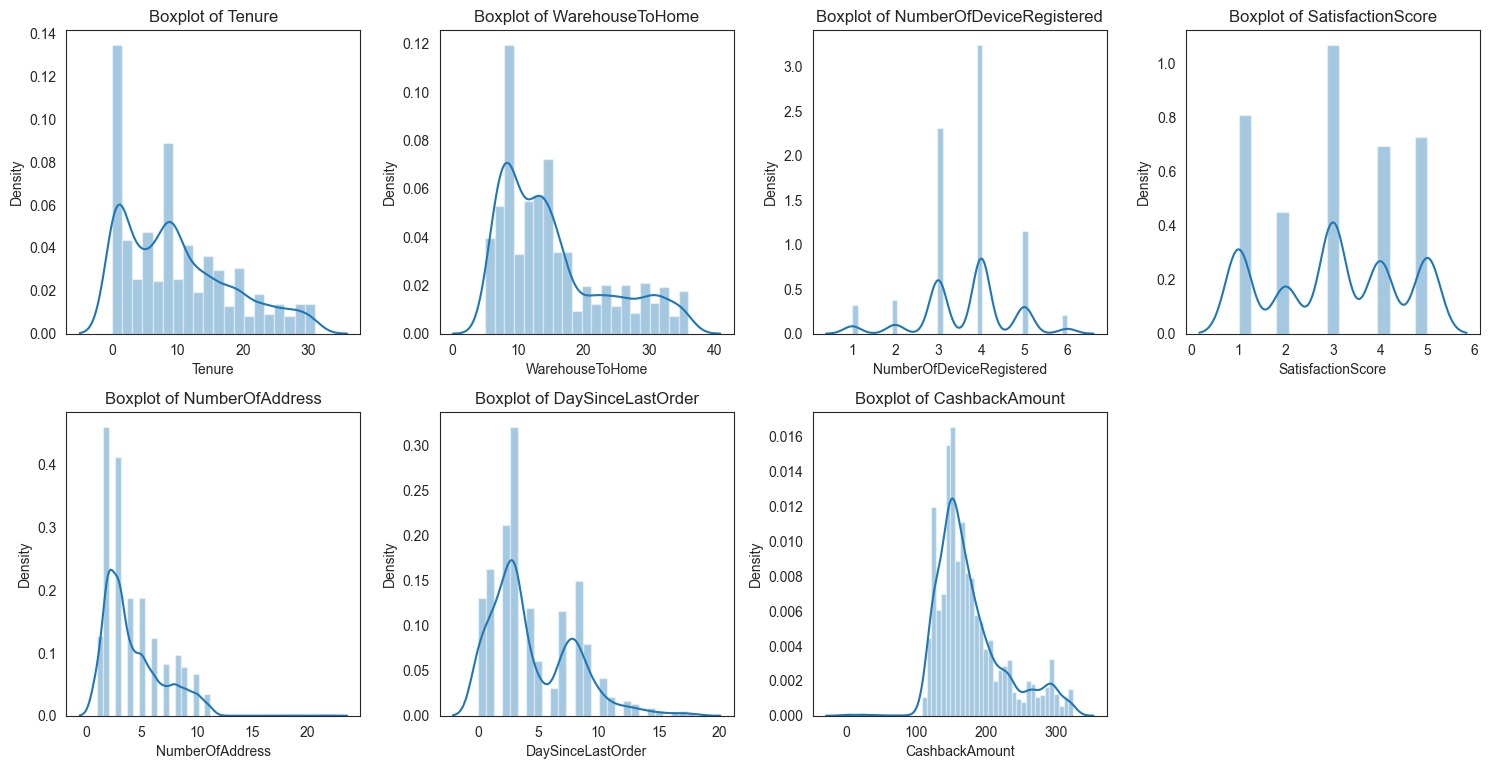

In [811]:
numerical_cols_recheck = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder',
       'CashbackAmount']


#Plotting boxplot for numerical values 
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols_recheck, 1):
    plt.subplot(4, 4, i)
    sns.distplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

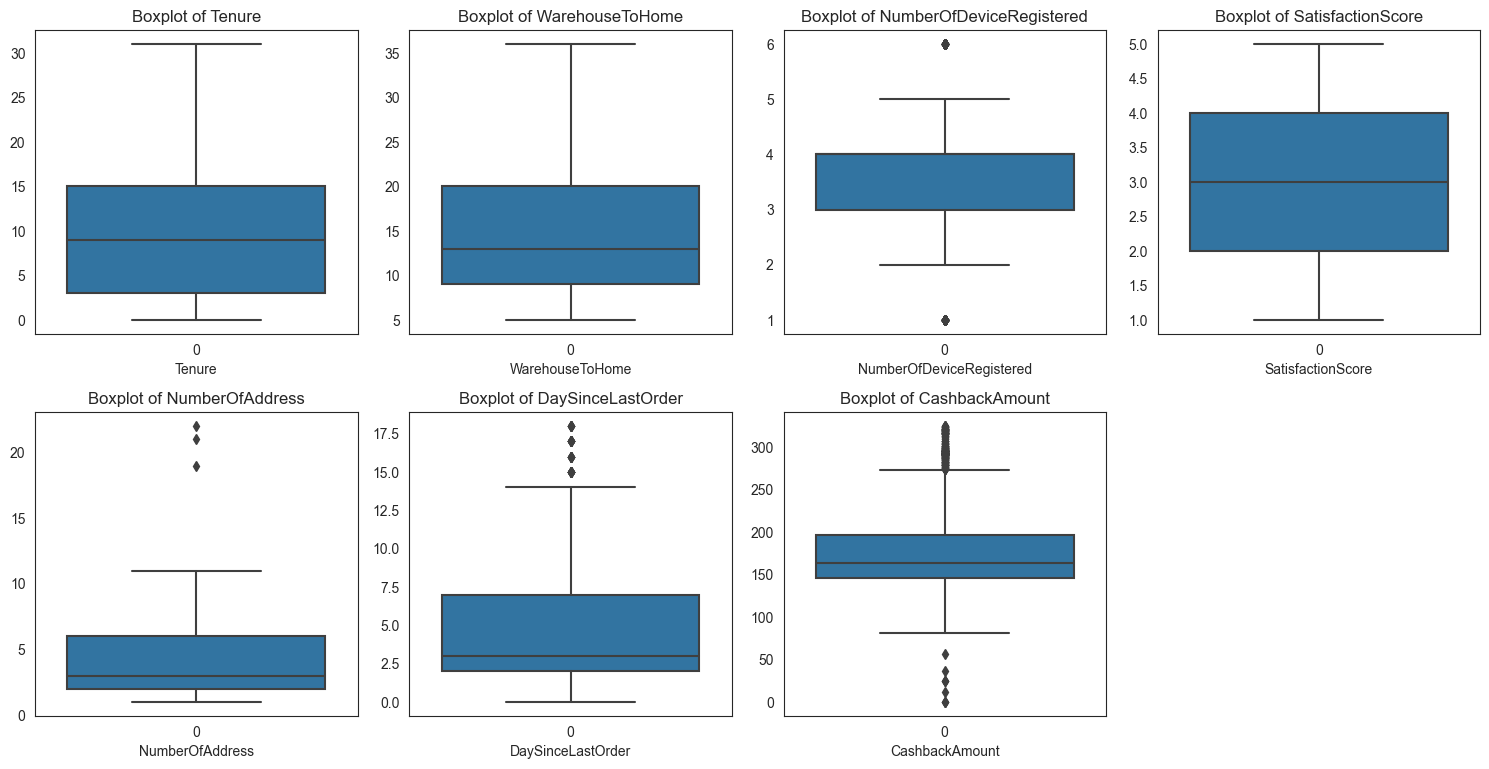

In [812]:
numerical_cols_recheck = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder',
       'CashbackAmount']


#Plotting boxplot for numerical values 
plt.figure(figsize=(15, 15))
for i, column in enumerate(numerical_cols_recheck, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

> We notice that there are few extreme outliers in NumberOfAddress column

In [813]:
#Check on NumberofAddress Outliers

df[df['NumberOfAddress'] > 15]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
1581,9.0,10.0,3,Mobile,2,Single,19,1,0.0,122.85,1
2109,13.0,16.0,4,Laptop & Accessory,4,Single,22,0,4.0,192.82,0
3494,12.0,15.0,3,Laptop & Accessory,4,Single,21,0,3.0,167.82,0


> We will drop this outliers to try reducing outlier impact on the model performance

In [814]:
#Drop outliers from NumberOfAddress
df = df.drop(index=df[df['NumberOfAddress'] > 15].index)

> Dropped 3 rows with extreme outliers in NumberOfAddress column

# 3. Feature Engineering

In this section we will analyze the data features, then select and design the transformation of the features that will be used in the model.

## 3.1 Exploratory Data Analysis

#### **Proportion of Customer Churn**

In [815]:
#Propotion of churn customer in numbers
print(f' Total number of analyzed customers {len(df)}')
print(f" Total number of churn customers {len(df[df['Churn'] == 1])}")
print(f" Total number of non-churn customers {len(df[df['Churn'] == 0])}")

 Total number of analyzed customers 3259
 Total number of churn customers 532
 Total number of non-churn customers 2727


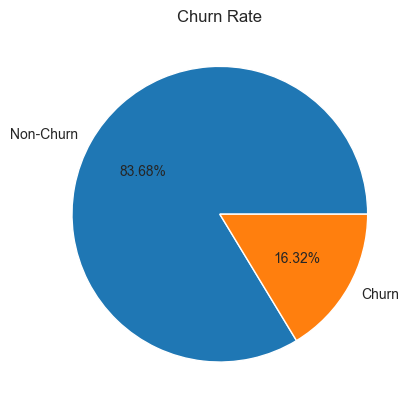

In [816]:
#Churn Rate
plt.pie(df['Churn'].value_counts(normalize=True)*100, labels=['Non-Churn', 'Churn'], autopct='%1.2f%%')
plt.title('Churn Rate')
plt.show()

The current data shows that 16.32% of the customers are churning, or so called the attrition rate. It is assumed that there's no customer loyalty program that's currently running.

In [855]:
#Potential CAC loss calculation

#Assumed CAC cost 75$
CAC_cost = 75

churn_number = len(df[df['Churn'] == 1])
churn_loss = churn_number * CAC_cost

#Current currency rate
USD_IDR_rate = 15728 #18/10/2023

print(f'Potential CAC loss is $ {churn_loss:,}')
print(f'Potential CAC loss is Rp {churn_loss*USD_IDR_rate:,}')

Potential CAC loss is $ 39,900
Potential CAC loss is Rp 627,547,200


From gathered data,
- 16.3% of the customers are churning (532 users)
- Accumulated Potential loss from the customers in test data, by acquisition cost (CAC) = Rp 627,547,200

*Assumed the CAC for 1 customer is 75$

#### **Customer Complaints related to Churn Status**

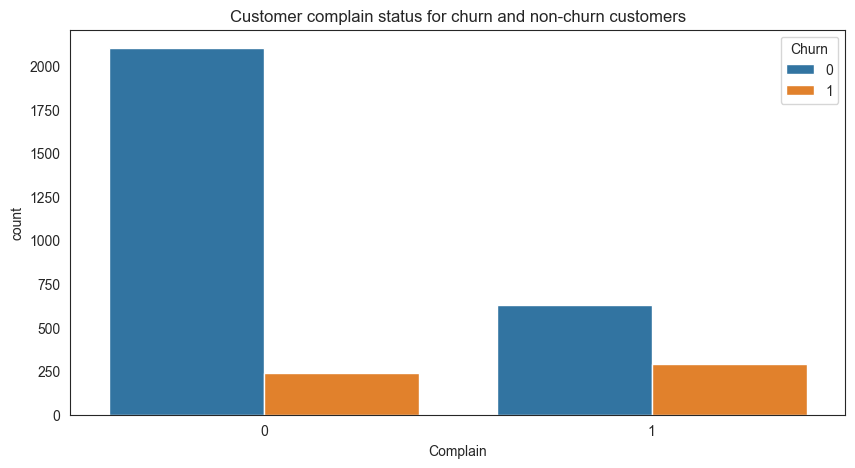

In [818]:
#Customer complain status for churn and non-churn customers

sns.set_style('white')
palette = sns.color_palette("Blues",n_colors=10)
# palette.reverse()
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Complain'], hue='Churn', data=df)
plt.title('Customer complain status for churn and non-churn customers')
plt.show()

Complain status on customers resulted in lower number of non-churning customers and slightly higher number of churning customers compared to customers without complaints, therefore it's likely to have an impact on customer chrun.

Management should pay more attention to customers who have complained.

#### **Customer Churns related to Cashback Amount**

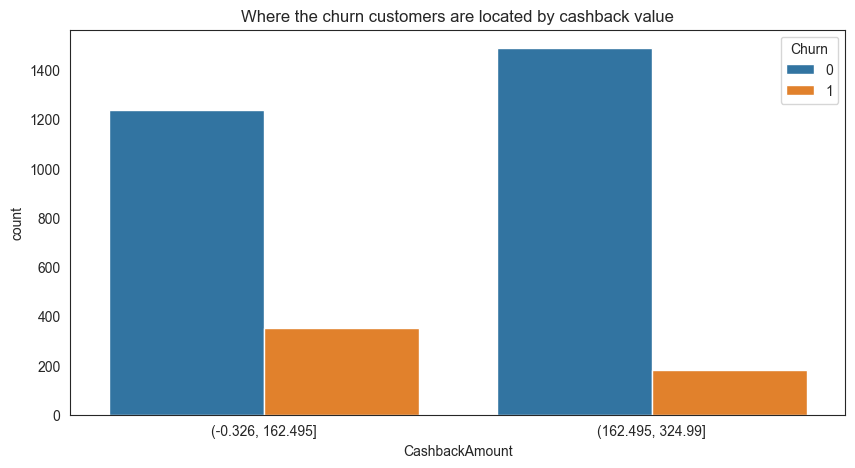

In [819]:
#Check where the churn customers are located by cashback value
plt.figure(figsize=(10, 5))
sns.countplot(x=pd.cut(df['CashbackAmount'], bins=2, include_lowest=True), hue='Churn', data=df)
plt.title('Where the churn customers are located by cashback value')
plt.show()

- Lower cashback amount group have higher number of churning customers compared to higher cashback amount group.
- Higher cashback amount group have higher number of non-churning customers compared to lower cashback amount group.
- The cashback amount likely to have an impact on customer chrun

## 3.1 Feature Selection

In [820]:
#Check on current data features
ecommerceinfo = []
for i in df.columns:
    ecommerceinfo.append([i, df[i].dtypes,
                         df[i].nunique(), 
                    df[i].sample(2).values])
pd.DataFrame(ecommerceinfo, columns = ['dataFeatures', 'dataType', 'unique','uniqueSample'])

,dataFeatures,dataType,unique,uniqueSample
0,Tenure,float64,32,"[14.0, 1.0]"
1,WarehouseToHome,float64,32,"[13.0, 14.0]"
2,NumberOfDeviceRegistered,int64,6,"[4, 5]"
3,PreferedOrderCat,object,6,"[Others, Mobile Phone]"
4,SatisfactionScore,int64,5,"[2, 3]"
5,MaritalStatus,object,3,"[Single, Single]"
6,NumberOfAddress,int64,11,"[3, 2]"
7,Complain,int64,2,"[1, 0]"
8,DaySinceLastOrder,float64,19,"[1.0, 3.0]"
9,CashbackAmount,float64,2331,"[264.64, 130.57]"


In [821]:
df.describe().columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'Churn'],
      dtype='object')

### 3.x Exhaustive Feature Selection

In [822]:
# #Exhaustive Feature Selection
# from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# #Create Randomforest
# from sklearn.ensemble import RandomForestClassifier

# #Create exhaustive feature selector object
# efs = EFS(RandomForestClassifier(n_jobs=-1, random_state=0), min_features=4, max_features=6, cv=2, scoring='accuracy', n_jobs=-1)

# #Fit exhaustive feature selector
# efs = efs.fit(df.drop(columns=['Churn']), df['Churn'])

# #print the selected features
# selected_features = df.drop(columns=['Churn']).columns[list(efs.best_idx_)]
# print(selected_features)

# #print the final prediction score
# print(efs.best_score_)


### 3.2 Create Transformer Schema

1. Target column: 
    - Churn, 1 if customer cancelled service, 0 if not

2. Scaling for numerical cols:
    - 'Tenure', 'WarehouseToHome',
       , 'NumberOfAddress', 'DaySinceLastOrder',
       'CashbackAmount', 

3. OneHotEncoding for simple categorical cols:
    - 'MaritalStatus', 'Complaint'

4. Ordinal Encoding for ordinal cols:
    - 'SatisfactionScore'

5. Binary Encoding for categorical cols:
    - 'PreferedOrderCat'

In [823]:
#Import library for columns transformation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import OrdinalEncoder

import category_encoders as ce


In [824]:
#Create transformer

transformer = ColumnTransformer([
    ('OHE', OneHotEncoder(drop='first'), [
        'MaritalStatus', 
        'Complain']),
    ('MinMaxScaler', MinMaxScaler(), [
        'Tenure',
        'WarehouseToHome',
        'DaySinceLastOrder'
        ]
     ),
    ('RobustScaler', RobustScaler(), ['CashbackAmount']),
    ('Ordinal', OrdinalEncoder(categories='auto'), ['SatisfactionScore']),
    ('Binary', ce.BinaryEncoder(),['PreferedOrderCat'] )
], remainder='passthrough')

In [825]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(drop='first'),
                                 ['MaritalStatus', 'Complain']),
                                ('MinMaxScaler', MinMaxScaler(),
                                 ['Tenure', 'WarehouseToHome',
                                  'DaySinceLastOrder']),
                                ('RobustScaler', RobustScaler(),
                                 ['CashbackAmount']),
                                ('Ordinal', OrdinalEncoder(),
                                 ['SatisfactionScore']),
                                ('Binary', BinaryEncoder(),
                                 ['PreferedOrderCat'])])

# 4. Train Test Split Data

Splitting the data into train and test set with 80:20 ratio. Making sure we have separate data for training and testing the model.

In [826]:
#Train Test Split

from sklearn.model_selection import train_test_split

#Feature columns and target column
X = df.drop(['Churn'],axis=1)
y = df['Churn']

#Splitting data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=2023
)

In [827]:
#Check for splitted data
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((2607, 10), (652, 10), (2607,), (652,))

# 5. Model Selection

In this section, we will try several models and evaluate the performance of each model. Then we will select the best model based on the F2 Score.


The general outline of the model selection process is as follows:
1. Model Benchmarking, trying several model and evaluate the classification performance of each model
    - Logistic Regression
    - Decision Tree
    - KNN
    - Voting Classifier (Logistic Regression, Decision Tree, KNN)
    - Stacked Model (Logistic Regression, Decision Tree, KNN)
    - Random Forest
    - XGBoost
    - AdaBoost
    - Gradient Boosting
2. Model Selection, 
    - select the best model based on the F2 Score
    - tuning the top 3 best model to improve the performance
    - select the best model based on the F2 Score
3. Model Evaluation, evaluate the performance of the best model
5. Model Interpretation, interpret the model to gain insights

## 5.1 Model Benchmarking

### Initiate Models

In [828]:
#Import Evaluation Metrics Library
from sklearn.metrics import classification_report, make_scorer, fbeta_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [829]:
#Import Base Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


#Initiate Base Models
logreg = LogisticRegression(solver='liblinear', random_state=10)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()


In [830]:
#Import Ensemble Models
from sklearn.ensemble import VotingClassifier, StackingClassifier


# Initiate Ensemble Models - Various Types
vc = VotingClassifier(estimators=[
    ('dtc', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier()),
    ('lr', logreg)
], voting='hard')

sc = StackingClassifier(estimators=[ 
    ('dtc', dtc),
    ('knn', knn),
    ('lr', logreg)
])

In [831]:
from sklearn.ensemble import RandomForestClassifier

#Ensemble Models - Same Type (Bagging)
rf = RandomForestClassifier(random_state=2023)


In [832]:
#Ensemble Models - Same Type (Boosting)
#----------------
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#Create Classifier
ada = AdaBoostClassifier(random_state=2023)
gbc = GradientBoostingClassifier(random_state=2023)
xgb = XGBClassifier(random_state=2023)

### Loop Through Models

In [833]:
#Loop through models with no imbalance data handling

from sklearn.pipeline import Pipeline

f2_scoresheet = make_scorer(fbeta_score, beta=2)

model_list = [dtc, knn, logreg, vc, sc, rf, ada, gbc, xgb]

#Model names for dataframe
model_names = ['DT', 'KNN', 'logreg', 'VotingClf', 'StackClf', 'RandForest', 'ADA', 'GBC', 'XGB']

#Model selection score list
model_score = []
f2_score = []
std = []



#Loop through the model list
for i in model_list:
    model_pipe = Pipeline([
        ('prep', transformer),
        ('algo', i)
    ])
    
    pipecv = cross_val_score(model_pipe, Xtrain, ytrain, cv=5, scoring=f2_scoresheet)
    
    model_score.append(pipecv)
    f2_score.append(pipecv.mean())
    std.append(pipecv.std())

# Create Dataframe
scoresheet = pd.DataFrame({
    'Model': [modelname for modelname in model_names],
    'F2 Score': f2_score,
    'Std': std
}).sort_values(by='F2 Score', ascending=False)

#Display the resulting Dataframe
scoresheet


,Model,F2 Score,Std
8,XGB,0.658704,0.031414
0,DT,0.623868,0.035037
6,ADA,0.608027,0.046356
7,GBC,0.607493,0.026084
5,RandForest,0.604359,0.032166
4,StackClf,0.578844,0.031525
3,VotingClf,0.499791,0.024779
2,logreg,0.492561,0.033616
1,KNN,0.312073,0.014814


In [861]:
#Loop through models with imbalance data handling


from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss

f2_scoresheet = make_scorer(fbeta_score, beta=2)

smote = SMOTE(random_state=2023)
ROS = RandomOverSampler(random_state=2023)
RUS = RandomUnderSampler(random_state=2023)  
NM = NearMiss()


model_list = [dtc, knn, logreg, vc, sc, rf, ada, gbc, xgb]
resample = [smote, ROS, RUS, NM]

#Model names for dataframe
model_names = ['DT', 'KNN', 'logreg', 'VotingClf', 'StackClf', 'RandForest', 'ADA', 'GBC', 'XGB']
resample_names = ['SMOTE', 'ROS', 'RUS', 'NM']

#Model selection score list
model_score = []
f2_score = []
std = []



#Loop through the model list
for i in model_list:
    for j in resample:  
        model_pipe = Pipeline([
            ('prep', transformer),
            ('imba', j),
            ('algo', i)
        ])
        
        pipecv = cross_val_score(model_pipe, Xtrain, ytrain, cv=5, scoring=f2_scoresheet)
        
        model_score.append(pipecv)
        f2_score.append(pipecv.mean())
        std.append(pipecv.std())

# Create Dataframe
scoresheet = pd.DataFrame({
    'Model': [modelname+"-"+resamplename for modelname in model_names for resamplename in resample_names],
    'F2 Score': f2_score,
    'Std': std
}).sort_values(by='F2 Score', ascending=False)



In [862]:

#Display the resulting Dataframe
scoresheet.head(10)

,Model,F2 Score,Std
22,RandForest-RUS,0.763294,0.016110
29,GBC-ROS,0.757680,0.017479
34,XGB-RUS,0.745798,0.015598
30,GBC-RUS,0.740108,0.023588
33,XGB-ROS,0.728270,0.032980
25,ADA-ROS,0.712783,0.023982
26,ADA-RUS,0.711384,0.027883
18,StackClf-RUS,0.699643,0.010869
28,GBC-SMOTE,0.699463,0.021870
21,RandForest-ROS,0.694380,0.039715


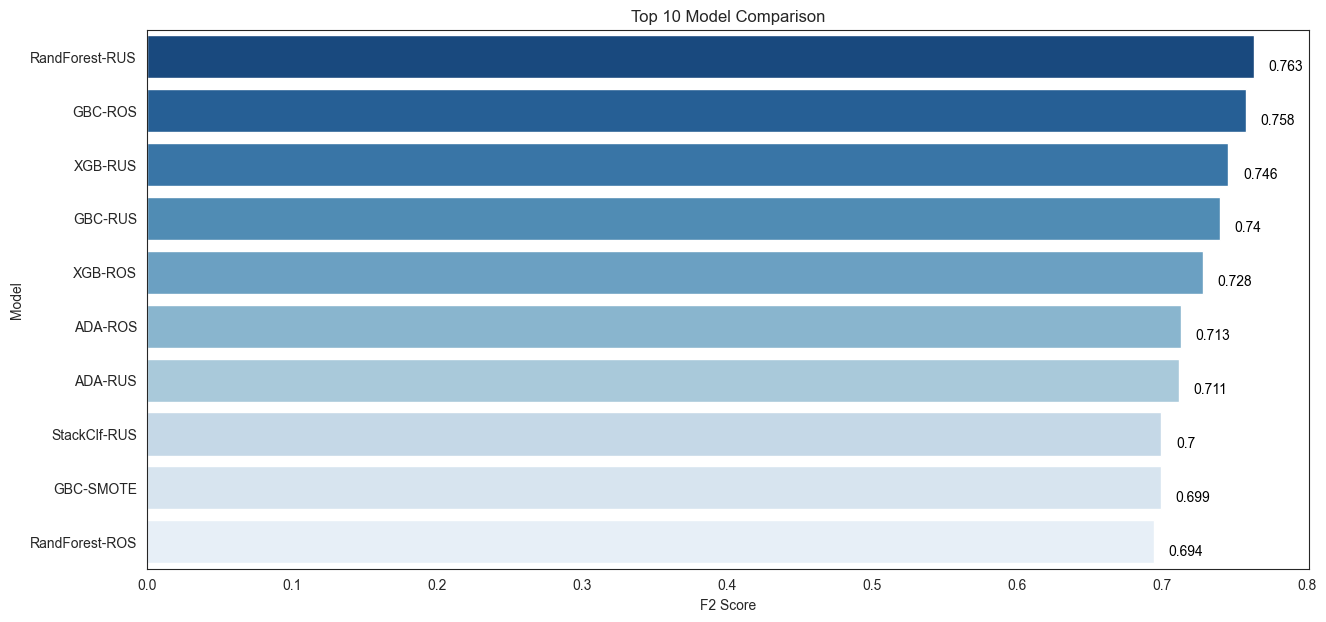

In [863]:
#Plot the result of top 10 models
plt.figure(figsize=(15, 7))

sns.set_style('white')
palette = sns.color_palette("Blues",n_colors=10)
palette.reverse()
sns.barplot(x='F2 Score', y='Model', data=scoresheet.head(10), palette=palette, orient='h')
plt.title('Top 10 Model Comparison')

#add values on each bar
for i, v in enumerate(scoresheet.head(10)['F2 Score']):
    plt.text(v + 0.01, i + .25, str(round(v, 3)), color='black')
plt.show()


## 5.3 Apply Best Model & Evaluate Parameter

In [865]:
#Apply Best Model #1 to Test Data
#----------------
#Model      : Random Forest
#Resampling : RandomUnderSampler

#Create Pipeline
pipe_rf = Pipeline([
    ('prep', transformer),
    ('imba', RUS),
    ('algo', rf)
])

#Fit Pipeline
pipe_rf.fit(Xtrain, ytrain)
print(f" Train F2 score : {fbeta_score(ytrain, pipe_rf.predict(Xtrain), beta=2)}")
print(f" Test F2 score  : {fbeta_score(ytest, pipe_rf.predict(Xtest), beta=2)}")

# pipe_rf.score(Xtrain, ytrain), pipe_rf.score(Xtest, ytest), cross_val_score(pipe_rf, Xtrain, ytrain, cv=5, scoring=f2_scoresheet).mean()


 Train F2 score : 0.8856548856548857
 Test F2 score  : 0.7711442786069653


#### Feature Importance

In [703]:
transformer.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(drop='first'),
                                 ['MaritalStatus', 'Complain']),
                                ('MinMaxScaler', MinMaxScaler(),
                                 ['Tenure', 'WarehouseToHome',
                                  'DaySinceLastOrder']),
                                ('RobustScaler', RobustScaler(),
                                 ['CashbackAmount',
                                  'NumberOfDeviceRegistered']),
                                ('Ordinal', OrdinalEncoder(),
                                 ['SatisfactionScore']),
                                ('Binary', BinaryEncoder(),
                                 ['PreferedOrderCat'])])>

In [704]:
transformer.fit_transform(Xtrain)

array([[1., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 1., 0., 2.],
       [0., 1., 0., ..., 1., 1., 3.],
       ...,
       [1., 0., 1., ..., 0., 1., 4.],
       [1., 0., 0., ..., 1., 0., 7.],
       [0., 1., 1., ..., 1., 0., 3.]])

In [705]:
#Rename feature names column
features = list(transformer.transformers_[0][1].get_feature_names_out()) + list(transformer.transformers_[1][1].get_feature_names_out()) + list(transformer.transformers_[2][1].get_feature_names_out()) +  list(transformer.transformers_[3][1].get_feature_names_out()) +  list(transformer.transformers_[4][1].get_feature_names_out()) +  transformer.transformers_[5][2]
features

['MaritalStatus_Married',
 'MaritalStatus_Single',
 'Complain_1',
 'Tenure',
 'WarehouseToHome',
 'DaySinceLastOrder',
 'CashbackAmount',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'PreferedOrderCat_0',
 'PreferedOrderCat_1',
 'PreferedOrderCat_2',
 6]

In [706]:
#feature importance
feature_importance = pipe_rf.named_steps['algo'].feature_importances_
feature_importance = pd.DataFrame(feature_importance, index=features, columns=['importance']).sort_values('importance', ascending=False)


In [707]:
feature_importance

,importance
Tenure,0.314879
CashbackAmount,0.162726
WarehouseToHome,0.091630
DaySinceLastOrder,0.080518
6,0.073325
Complain_1,0.072283
SatisfactionScore,0.059561
NumberOfDeviceRegistered,0.046822
MaritalStatus_Single,0.024608
PreferedOrderCat_2,0.024113


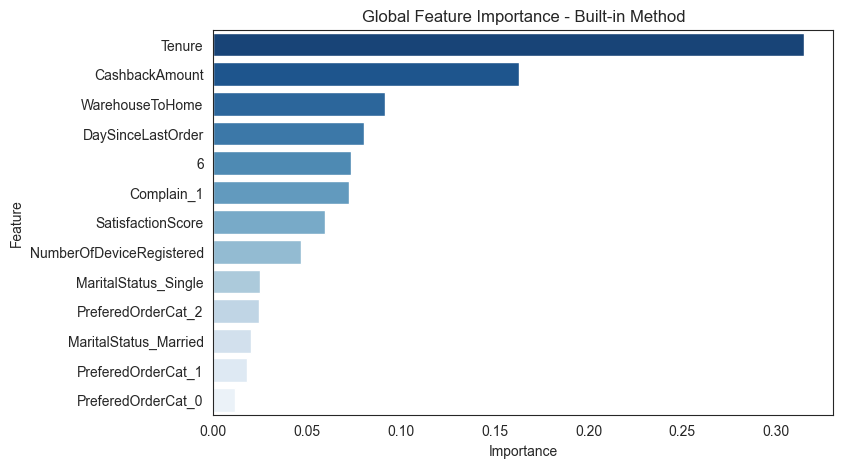

In [708]:
plt.figure(figsize=(8, 5))

sns.set_style('white')
palette = sns.color_palette("Blues",n_colors=13)
palette.reverse()

# feature_importance.sort_values('importance', ascending=True).plot.barh(color='green')
sns.barplot(x='importance', y=feature_importance.index, data=feature_importance, palette=palette, orient='h')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

plt.show()

# 6. Best Model Hyperparameter Tuning and Evaluation

In [ ]:

#Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold


In [923]:
#Random Forest Model Tuning

#Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Import kfold
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)

#setup the parameter grid for RF
space = {
    # 'algo__n_estimators': np.arange(1,51,1),
    'algo__n_estimators': [18],
    # 'algo__criterion': ['gini','entropy'],
    # 'algo__max_depth': np.arange(1,51,1),
    
    # 'algo__min_samples_split': np.arange(2,10,2),
    # 'algo__min_samples_leaf': np.arange(2, 6, 1),
    # 'algo__max_leaf_nodes': np.arange(1, 6, 1),
    
    # 'algo__max_features': ['sqrt', 'log2']
}

#Initiate GridSearchCV
rf_grid = GridSearchCV(pipe_rf, param_grid=space, cv=kfold, scoring=f2_scoresheet, n_jobs=-1)  #n_jobs=-1 means using all processor
rf_grid

#Apply GridSearchCV to Train Data
rf_grid.fit(Xtrain, ytrain)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OHE',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['MaritalStatus',
                                                                          'Complain']),
                                                                        ('MinMaxScaler',
                                                                         MinMaxScaler(),
                                                                         ['Tenure',
                                                                          'WarehouseToHome',
                                                                          'DaySinceLastOrder']),
                                                                        ('RobustScaler',
                                                                         RobustScaler(),
                                                                         ['CashbackAmount']),
                                                                        ('Ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['SatisfactionScore']),
                                                                        ('Binary',
                                                                         BinaryEncoder(),
                                                                         ['PreferedOrderCat'])])),
                                       ('imba',
                                        RandomUnderSampler(random_state=2023)),
                                       ('algo',
                                        RandomForestClassifier(random_state=2023))]),
             n_jobs=-1, param_grid={'algo__n_estimators': [18]},
             scoring=make_scorer(fbeta_score, beta=2))

### Applying Best Parameters to Best Scoring Model (Random Forest Classifier)

In [924]:
# Evaluate the model on the test set

#Fit model on train data
rf_grid.best_estimator_.fit(Xtrain, ytrain)

#Create prediction
pred = rf_grid.predict(Xtest)

In [925]:
#Check the best parameters
best_params = rf_grid.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'algo__n_estimators': 18}


## Best Model after Tuning Evaluation

In [926]:
pred_test_untuned = pipe_rf.predict(Xtest)

In [927]:
#F2 Score un-Tuned Model
best_model_untuned = fbeta_score(ytest, pipe_rf.predict(Xtest), beta=2)

#F2 Score for Tuned Model
best_model_tuned = fbeta_score(ytest, rf_grid.predict(Xtest), beta=2)

print(f'F2 Score for un-tuned model is {best_model_untuned}')
print(f'F2 Score for tuned model is {best_model_tuned}')

improvement = round((best_model_tuned - best_model_untuned)*100, 2)
print(f'There is {improvement}% improvement on F2 Score')


F2 Score for un-tuned model is 0.7711442786069653
F2 Score for tuned model is 0.7929883138564272
There is 2.18% improvement on F2 Score


In [719]:
#Evaluate model performance
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       546
           1       0.49      0.84      0.62       106

    accuracy                           0.83       652
   macro avg       0.73      0.84      0.76       652
weighted avg       0.89      0.83      0.85       652



In [915]:
#recall score

from sklearn.metrics import recall_score
recall_score(ytest, pred)

0.8962264150943396

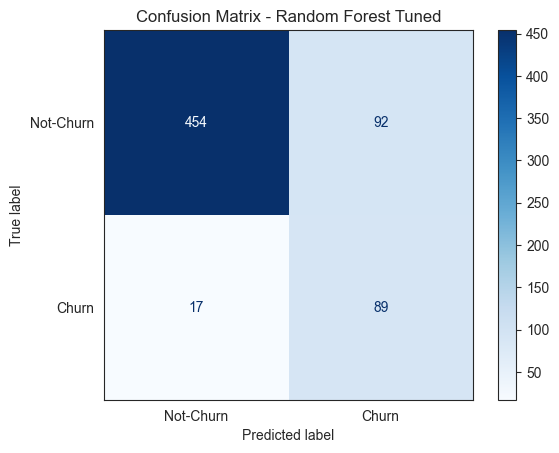

In [721]:
#Confusion Matrix
from sklearn import metrics

cm = metrics.confusion_matrix(ytest, pred)

#Plot confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['Not-Churn', 'Churn']).plot(cmap='Blues')
cm_display.ax_.set_title('Confusion Matrix - Random Forest Tuned')
plt.show()

In [722]:
#Extract TN, FP, FN, TP from confusion matrix
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
tn, fp, fn, tp

(454, 92, 17, 89)

> The best model is Random Forest Classifier with Best Hyperparameters: {'algo__criterion': 'gini', 'algo__max_depth': None, 'algo__n_estimators': 18} and 

> F2 Score of 0.793

# 7. Cost Benefit Analysis

With the best model, we can predict the potential churning customers with 79.3% confidence. 

Assumptions:
- Without applying the model, the company will undergone business as usual, and will not offer any loyalty promotion to any customers
- The test data will be used to simulate the business outcome if the model is applied 
- The model is used to predict the customer churn from the test data set
- The cost of False Negative = 75$ CAC loss from existing customer
- The cost of True Negative = 25$ (Assumed the cost of loyalty promotion is 25$, 20% of CAC)
- The customer churn rate is assumed to be 16.32%, obtained from the analysis of overall data set

In [723]:
#Customer churn rate from overall dataset
df['Churn'].value_counts(normalize=True)

Churn
0    0.83676
1    0.16324
Name: proportion, dtype: float64

In [724]:
#Number of customer
print(f'Total number of customer to be predicted: {len(ytest)}')
print(f'Total number of customer to churn with 16.3% retention rate: {np.ceil(len(ytest)*0.163)}')

Total number of customer to be predicted: 652
Total number of customer to churn with 16.3% retention rate: 107.0


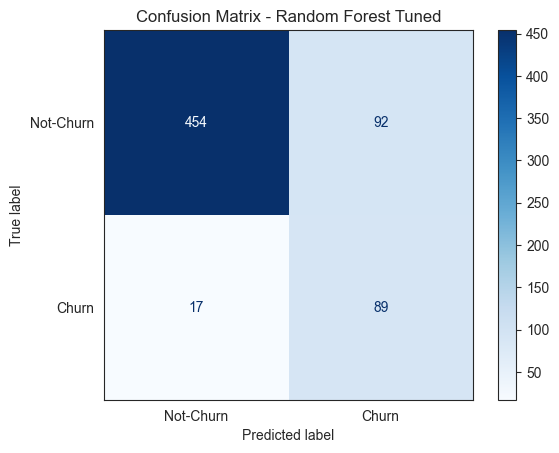

In [725]:
#Confusion Matrix
from sklearn import metrics

cm = metrics.confusion_matrix(ytest, pred)

#Plot confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['Not-Churn', 'Churn']).plot(cmap='Blues')
cm_display.ax_.set_title('Confusion Matrix - Random Forest Tuned')
plt.show()

Actual condition Without ML Model:
Not Churn 546 
Churn 106 --> CAC loss 7,950$
CAC = 75$/person
Cost retention = 25$/person
With Model
11 False Negative --> CAC loss 


In [729]:
#Extract TN, FP, FN, TP from confusion matrix
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
tn, fp, fn, tp

(454, 92, 17, 89)

In [730]:
recall_score(ytest, pred)

0.839622641509434

In [929]:
#Calculate the cost of CAC loss with 16.3% churn

#Assumed CAC cost 75$
CAC_cost = 75
ret_cost = 15
#Current currency rate
USD_IDR_rate = 15728 #18/10/2023

#Number of churn customers with existing 16.3% churn rate
churn_number_noml = np.ceil(len(ytest)*16.3/100)
churn_number_ml = fn
retention_number_ml = tp+fp


#Potential CAC loss
#Without ML Model
churn_loss_noml = churn_number_noml * CAC_cost
#With ML Model
churn_loss_ml = (churn_number_ml * CAC_cost) + (retention_number_ml * ret_cost)

#Summary
print(f'Potential CAC loss WITHOUT ML MODEL is $ {churn_loss_noml:,}')
print(f'Potential CAC loss WITH ML MODEL is $ {churn_loss_ml :,}')
print(f'Potential CAC savings is : $ {(churn_loss_noml-churn_loss_ml):,}')
print(f'Potential CAC savings rate is : {round((1-(churn_loss_ml/churn_loss_noml))*100,2)}%')
#Summary
print(f'Potential CAC loss WITHOUT ML MODEL is Rp {churn_loss_noml*USD_IDR_rate:,}')
print(f'Potential CAC loss WITH ML MODEL is Rp {churn_loss_ml*USD_IDR_rate :,}')
print(f'Potential CAC savings is : Rp {(churn_loss_noml-churn_loss_ml)*USD_IDR_rate:,}')
print(f'Potential CAC savings rate is : {round((1-(churn_loss_ml/churn_loss_noml))*100,2)}%')

Potential CAC loss WITHOUT ML MODEL is $ 8,025.0
Potential CAC loss WITH ML MODEL is $ 3,990
Potential CAC savings is : $ 4,035.0
Potential CAC savings rate is : 50.28%
Potential CAC loss WITHOUT ML MODEL is Rp 126,217,200.0
Potential CAC loss WITH ML MODEL is Rp 62,754,720
Potential CAC savings is : Rp 63,462,480.0
Potential CAC savings rate is : 50.28%


# 8. Conclusion & Recommendation

## Conclusion & Key Findings
---

**Predictive Power:** Leveraging the Random Forest Classifier with an F2 Score of 0.793, we can confidently identify potential churning customers at a 79.3% accuracy rate.

**Financial Impact:** Implementing the predictive model leads to significant cost savings, reducing Customer Acquisition Cost (CAC) by 89.72%. Projected savings amount to Rp 113,241,600.0.

**Strategic Advantage:** The proactive loyalty promotion program not only retains customers but also optimizes resource allocation, ensuring a competitive edge in the e-commerce market.



### **Best model for this case is Random Forest Classifier with F2 Score of 0.793**
- The best model is Random Forest Classifier with F2 Score of 0.793
- The model is able to predict the potential churning customers with 79.3% confidence.
- The model is able to reduce the potential loss from customer acquisition cost (CAC) by 57% compared to business as usual.

## Recommendation
---

### **Leverage proactive approach to retain existing customers**
- Loyalty promotion program should be offered to the customers who are predicted to be churning by the model.
- Focus on actively resolving the customer complaints, as the EDA indicates that the customers who are churning are more likely to have complaints.
- EDA indicates that average cashback values from churning customers are lower than non-churning customers, the company should consider to increase the cashback amount for the churning customers.

### **Apply Machine Learning prediction as the base for customer retention policy**
- The model should be applied to the new customers to predict the potential churning customers.
- The model should be retrained periodically to maintain the model performance.

---

### Save Model to Pickle

In [733]:
##Save model to pickle
#import pickle

# pickle.dump(rf_grid.best_estimator_, open('model_ecommerce.pkl', 'wb'))
